In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 用简单的数字数据集，测试一下，多层全连接网络
digits = load_digits()
print(digits.keys())
data = digits.data
target = digits.target

print(data.shape)
print(target.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)


In [3]:
pd.Series(target).value_counts() #种类比例，基本一致

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

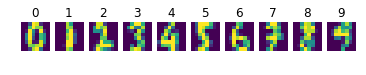

In [4]:
#随机选出每一类的一个样本看看长什么样子
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 1
for y, cla in enumerate(classes):
    idxs = np.flatnonzero(target == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(digits.images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cla)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
X = data
y = target

#分隔数据集合，分为train,test集合
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# 对label进行one-hot编码
y_train_label = LabelBinarizer().fit_transform(y_train)
y_test_label = LabelBinarizer().fit_transform(y_test)
# 或者用 one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)
print(X_train.shape)
print(X_test.shape)
print(y_train_label.shape)
print(y_test_label.shape)

(1437, 64)
(360, 64)
(1437, 10)
(360, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# input(None,64) - hidden(64,10) - output(10)
# 序贯模型（Sequential）
model = Sequential()
model.add(Dense(100,input_dim=64))
model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax')) #多分类
# 编译
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练
model.fit(X_train, y_train_label,
          epochs=50,
          batch_size=150)
# 评估
print('最后的验证集评估结果：')
score = model.evaluate(X_test, y_test_label, batch_size=150)
print(score)
# loss , acc

Epoch 1/50
1437/1437 [==============================] - 0s 237us/step - loss: 2.5802 - acc: 0.1392
Epoch 2/50
1437/1437 [==============================] - 0s 39us/step - loss: 2.2799 - acc: 0.2011
Epoch 3/50
1437/1437 [==============================] - 0s 38us/step - loss: 2.1287 - acc: 0.2526
Epoch 4/50
1437/1437 [==============================] - 0s 47us/step - loss: 2.0249 - acc: 0.3132
Epoch 5/50
1437/1437 [==============================] - 0s 45us/step - loss: 1.9399 - acc: 0.3890
Epoch 6/50
1437/1437 [==============================] - ETA: 0s - loss: 1.9327 - acc: 0.420 - 0s 42us/step - loss: 1.8652 - acc: 0.4718
Epoch 7/50
1437/1437 [==============================] - 0s 40us/step - loss: 1.7966 - acc: 0.5532
Epoch 8/50
1437/1437 [==============================] - 0s 40us/step - loss: 1.7325 - acc: 0.6221
Epoch 9/50
1437/1437 [==============================] - 0s 51us/step - loss: 1.6729 - acc: 0.6715
Epoch 10/50
1437/1437 [==============================] - 0s 51us/step - loss: 1

In [11]:
#类似VGG的卷积神经网络：

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
# 输入层
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# 输出层
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'] )

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32) 
print('验证集评估结果：')
print(score)


Epoch 1/10
100/100 [==============================] - 19s 191ms/step - loss: 2.3824 - acc: 0.1000
Epoch 2/10
100/100 [==============================] - 17s 172ms/step - loss: 2.3331 - acc: 0.1100
Epoch 3/10
100/100 [==============================] - 19s 193ms/step - loss: 2.2907 - acc: 0.1000
Epoch 4/10
100/100 [==============================] - 17s 175ms/step - loss: 2.2918 - acc: 0.1300
Epoch 5/10
100/100 [==============================] - 17s 166ms/step - loss: 2.2909 - acc: 0.1300
Epoch 6/10
100/100 [==============================] - 17s 174ms/step - loss: 2.2925 - acc: 0.1000
Epoch 7/10
100/100 [==============================] - 17s 169ms/step - loss: 2.2823 - acc: 0.1700
Epoch 8/10
100/100 [==============================] - 17s 170ms/step - loss: 2.2786 - acc: 0.1500
Epoch 9/10
100/100 [==============================] - 18s 177ms/step - loss: 2.2657 - acc: 0.1300
Epoch 10/10
20/20 [==============================] - 1s 69ms/step
验证集评估结果：
[2.3388915061950684, 0.05000000074505806]
